In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("purchase_price_2017_december.csv")

In [3]:
data_1= pd.read_csv("beg_inv_final_2016.csv")

In [4]:
data_2= pd.read_csv("end_inv_final_2016.csv")

In [5]:
data_3= pd.read_csv("final_purchases_2016.csv")

In [6]:
data_4= pd.read_csv("invoice_purchases_2016.csv")

In [7]:
data_5= pd.read_csv("final_sales_2016.csv")

 # Exploring purchase price in december 2017

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12261 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12261 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12261 non-null  int64  
 6   PurchasePrice   12261 non-null  float64
 7   VendorNumber    12261 non-null  int64  
 8   VendorName      12261 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 862.2+ KB


In [9]:
data.describe()

,Brand,Price,Classification,PurchasePrice,VendorNumber
count,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,17989.067123,38.640240,1.708996,26.488220,10814.861757
std,12528.503464,206.151172,0.454244,156.182948,19007.682322
min,58.000000,0.000000,1.000000,0.000000,2.000000
25%,5990.000000,10.990000,1.000000,6.890000,3960.000000
50%,18788.000000,15.990000,2.000000,10.650000,7153.000000
75%,25117.000000,29.990000,2.000000,20.130000,9552.000000
max,90631.000000,13999.900000,2.000000,11111.030000,173357.000000


In [10]:
data.isnull().sum()

Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

In [11]:
data= data.dropna()

In [12]:
data.isnull().sum()

Brand             0
Description       0
Price             0
Size              0
Volume            0
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

In [22]:
data= data.drop_duplicates()

In [13]:
data.shape

(12260, 9)

In [14]:
data.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [15]:
data.tail()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
12256,44917,Ferreira 10-Yr Tawny Port,24.99,750mL,750,2,16.55,90024,VINILANDIA USA
12257,44944,Sanford Santa Rita Pnt Nr,22.99,750mL,750,2,14.93,4425,MARTIGNETTI COMPANIES
12258,45016,Neal One Lane Bridg Cab Svgn,93.99,750mL,750,2,61.43,10754,PERFECTA WINES
12259,46011,Folonari Pnt Nr Venezie,12.99,1500ml,1500,2,8.90,9744,FREDERICK WILDMAN & SONS
12260,46964,Calera Viognier Mt Harlan,35.99,750mL,750,2,24.32,10754,PERFECTA WINES


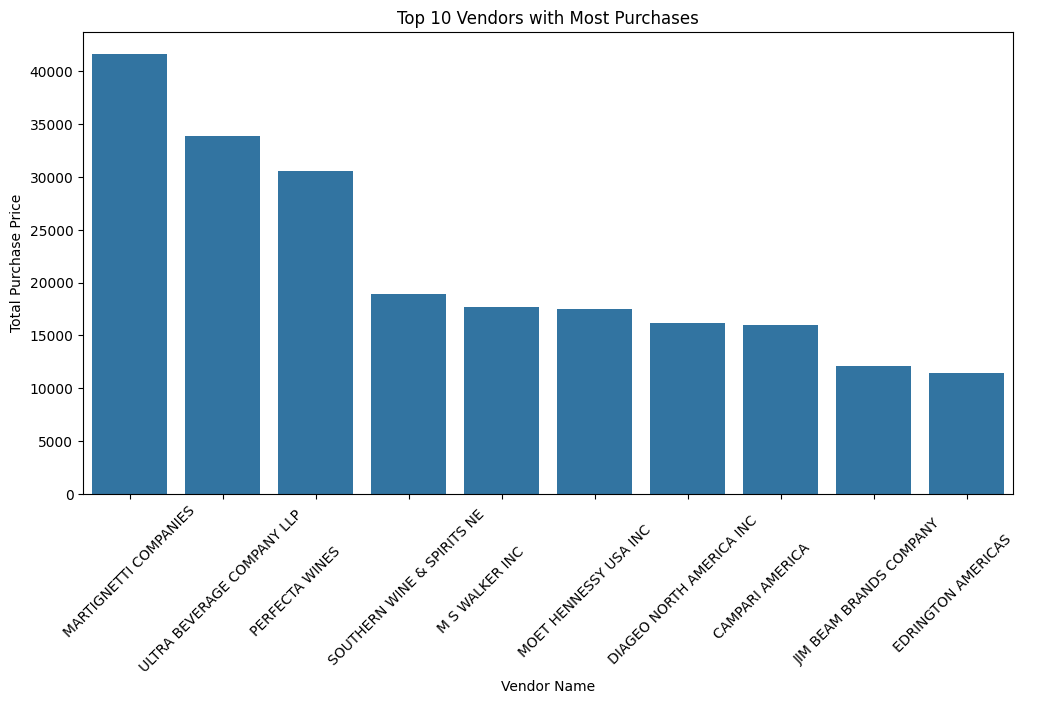

In [23]:
# Visualization 1: Top 10 Vendors with Most Purchases
top_10_vendors = data.groupby('VendorName')['PurchasePrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_vendors.index, y=top_10_vendors.values)
plt.title('Top 10 Vendors with Most Purchases')
plt.xlabel('Vendor Name')
plt.ylabel('Total Purchase Price')
plt.xticks(rotation=45)
plt.show()


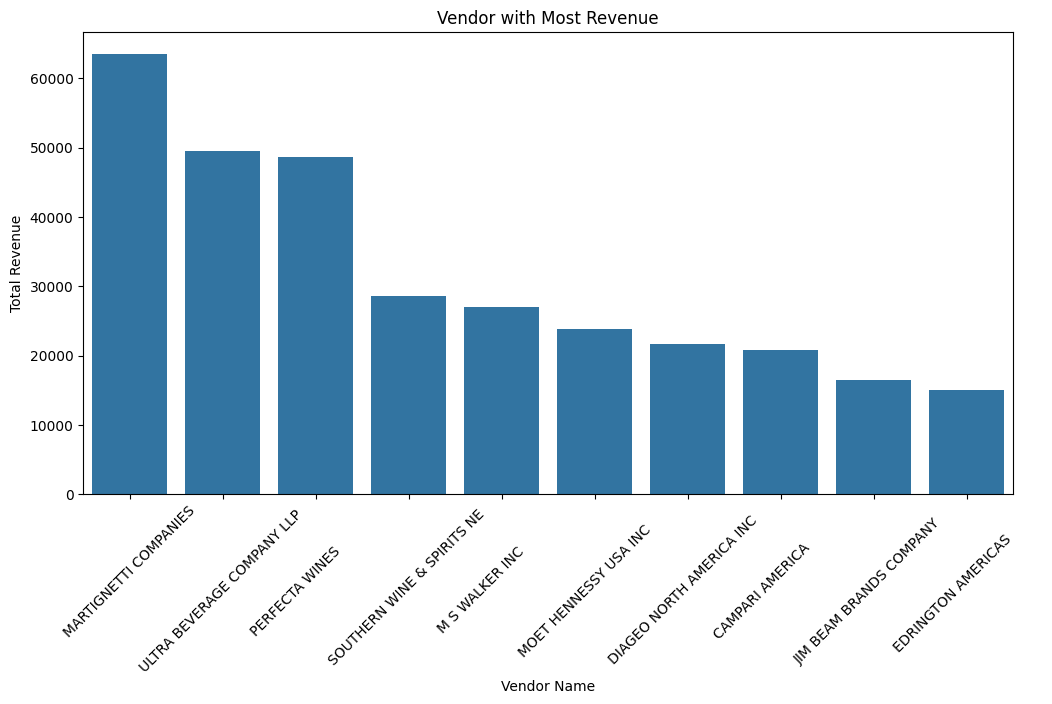

In [29]:
# Visualization 2: Vendor with Most Revenue
vendor_revenue = data.groupby('VendorName')['Price'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=vendor_revenue.index, y=vendor_revenue.values)
plt.title('Vendor with Most Revenue')
plt.xlabel('Vendor Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()



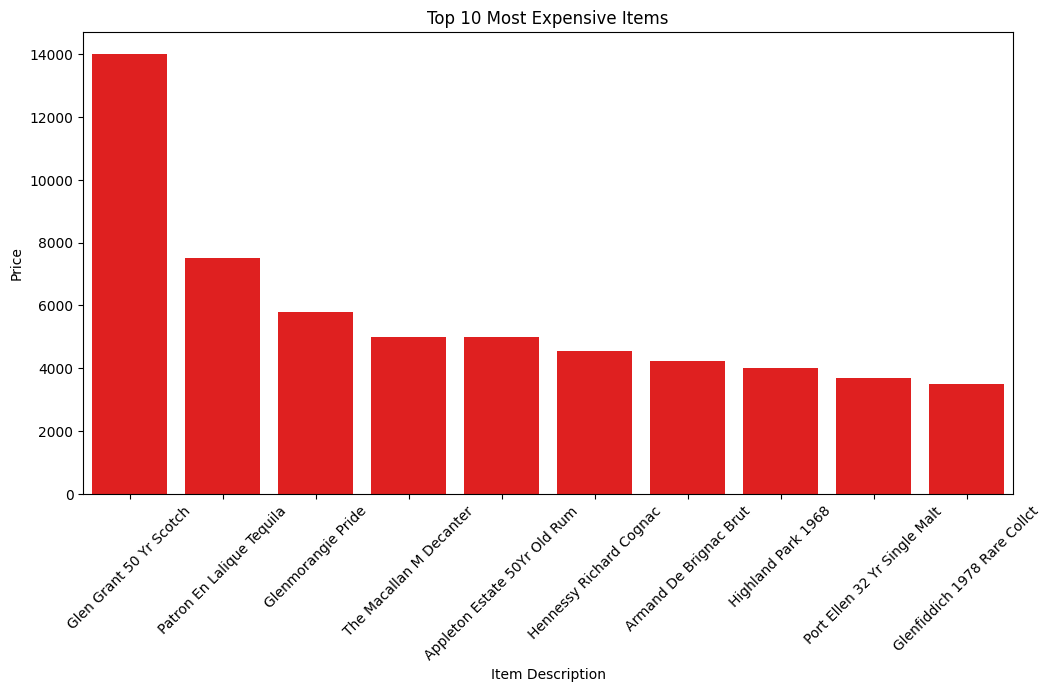

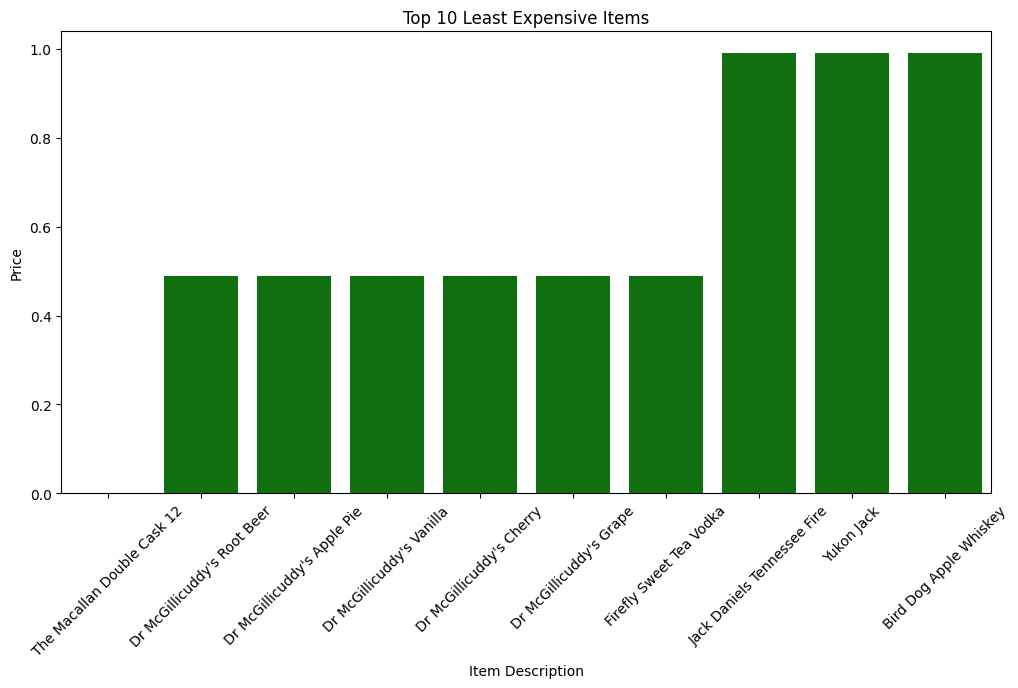

In [32]:
# Top 10 Most Expensive Items
top_10_expensive = data.nlargest(10, 'Price')
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_expensive['Description'], y=top_10_expensive['Price'], color='red')
plt.title('Top 10 Most Expensive Items')
plt.xlabel('Item Description')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Top 10 Least Expensive Items
top_10_least_expensive = data.nsmallest(10, 'Price')
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_least_expensive['Description'], y=top_10_least_expensive['Price'], color='green')
plt.title('Top 10 Least Expensive Items')
plt.xlabel('Item Description')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


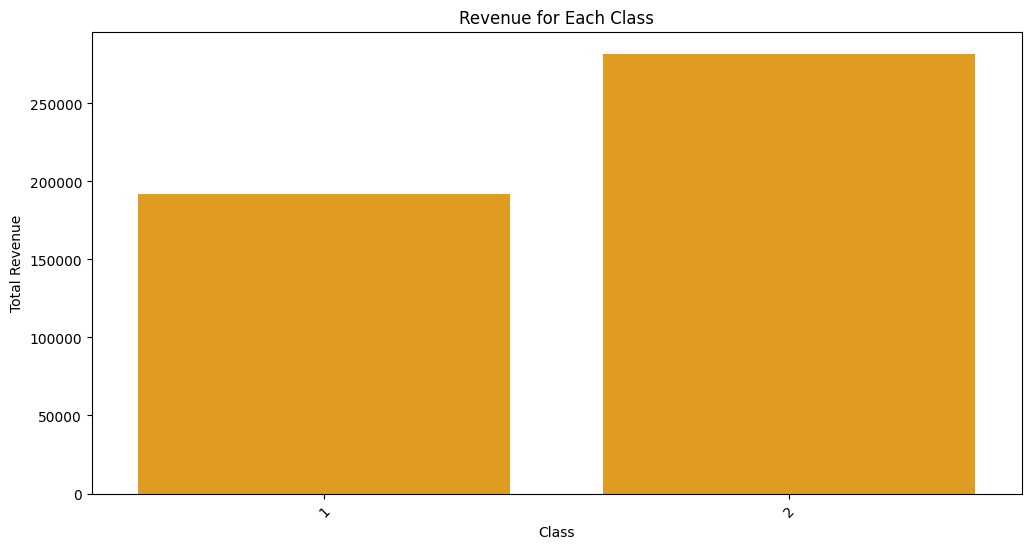

In [38]:
# Analysis: Revenue for Each Class
class_revenue = data.groupby('Classification')['Price'].sum().sort_values(ascending=False)

# Visualization: Revenue for Each Class
plt.figure(figsize=(12, 6))
sns.barplot(x=class_revenue.index, y=class_revenue.values, color='orange')
plt.title('Revenue for Each Class')
plt.xlabel('Class')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


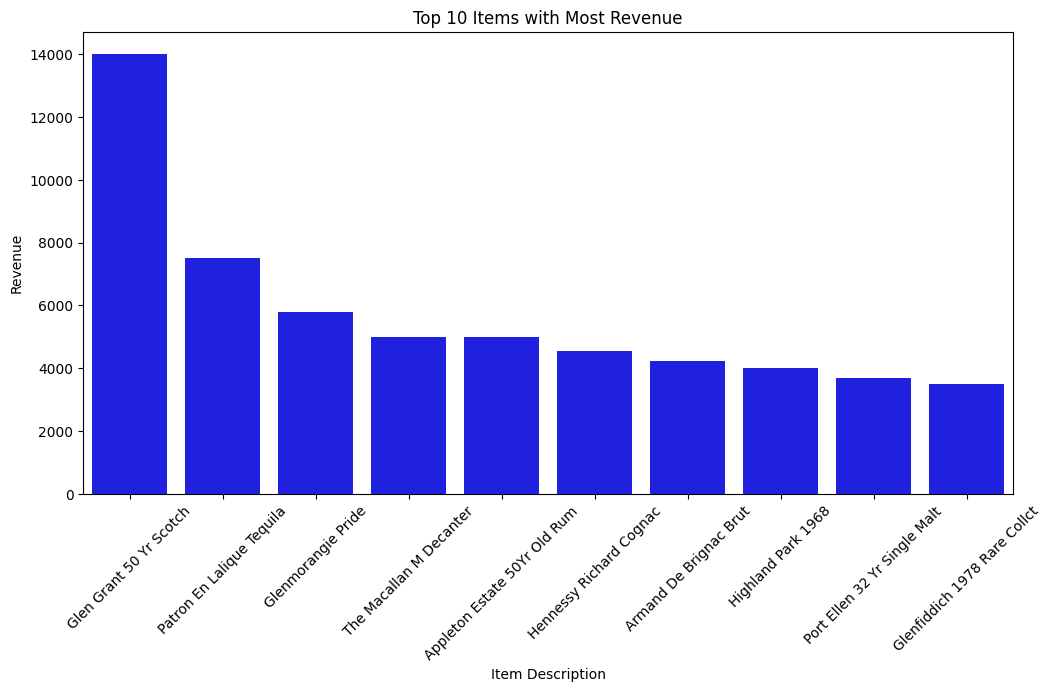

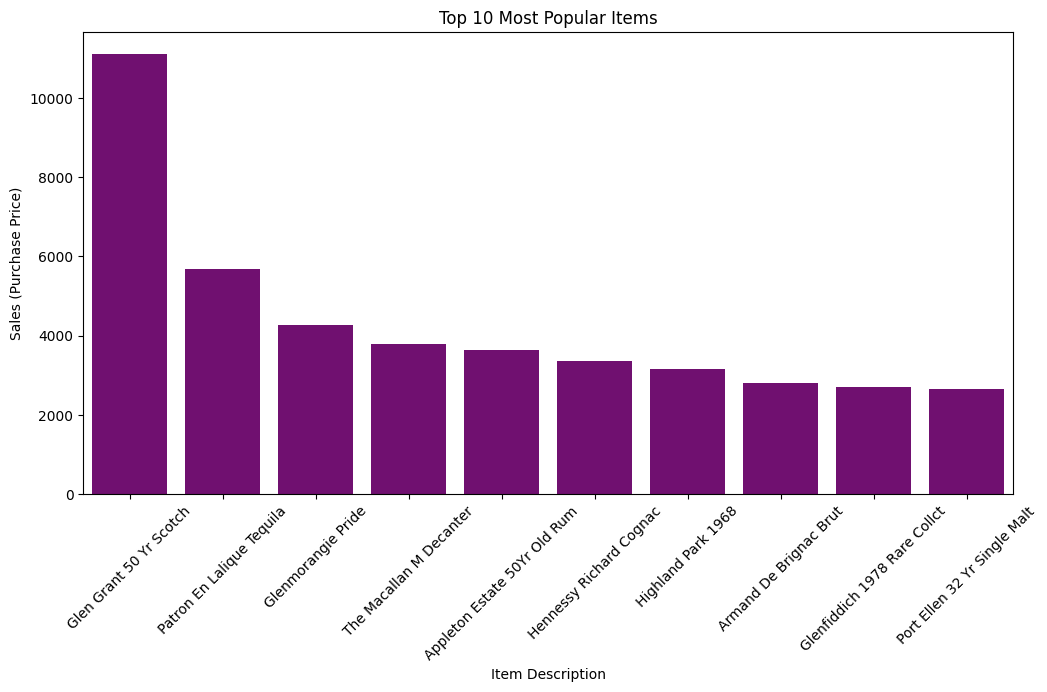

In [35]:
# Top 10 Items with Most Revenue
top_10_revenue_items = data.nlargest(10, 'Price')
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_revenue_items['Description'], y=top_10_revenue_items['Price'], color='blue')
plt.title('Top 10 Items with Most Revenue')
plt.xlabel('Item Description')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

# Top 10 Most Popular Items
top_10_popular_items = data.nlargest(10, 'PurchasePrice')
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_popular_items['Description'], y=top_10_popular_items['PurchasePrice'], color='purple')
plt.title('Top 10 Most Popular Items')
plt.xlabel('Item Description')
plt.ylabel('Sales (Purchase Price)')
plt.xticks(rotation=45)
plt.show()


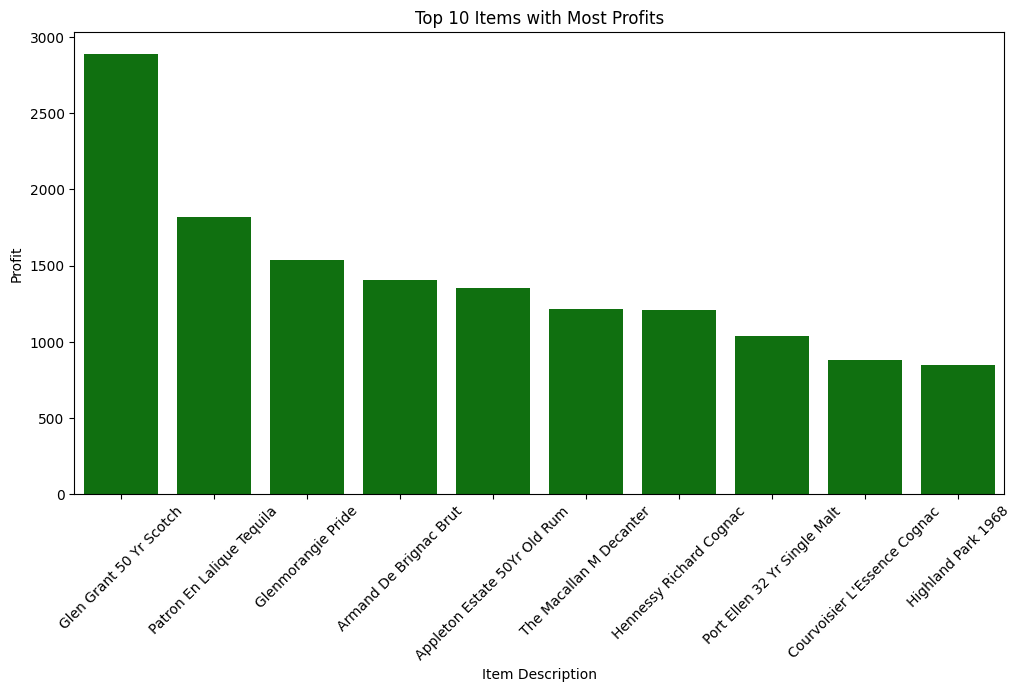

In [36]:
# Calculate Profit
data['Profit'] = data['Price'] - data['PurchasePrice']

# Top 10 Items with Most Profits
top_10_profit_items = data.nlargest(10, 'Profit')

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_profit_items['Description'], y=top_10_profit_items['Profit'], color='green')
plt.title('Top 10 Items with Most Profits')
plt.xlabel('Item Description')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()


# beg_inv_final_2016 exploration

In [37]:
data_1.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [39]:
data_1.tail()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
206524,79_BALLYMENA_46985,79,BALLYMENA,46985,Rodney Strong Cab Svgn Alexa,750mL,13,22.99,2016-01-01
206525,79_BALLYMENA_47014,79,BALLYMENA,47014,Juan Gil Jumilla Rd,750mL,13,13.99,2016-01-01
206526,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,19,23.99,2016-01-01
206527,79_BALLYMENA_90011,79,BALLYMENA,90011,Ch Pichon Longville 12 Pauil,750mL,12,144.99,2016-01-01
206528,79_BALLYMENA_90089,79,BALLYMENA,90089,Ch Lynch Bages 12 Pauillac,750mL,24,119.99,2016-01-01


In [41]:
data_1['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])

In [42]:
data_1['City'].unique()

array(['HARDERSFIELD', 'ASHBORNE', 'HORNSEY', 'EANVERNESS', 'SUTTON',
       'GOULCREST', 'STANMORE', 'ALNERWICK', 'BLACKPOOL', 'CARDEND',
       'LEESIDE', 'TARMSWORTH', 'BROMWICH', 'WANBORNE', 'LUNDY', 'OLDHAM',
       'FURNESS', 'WINTERVALE', 'BREDWARDINE', 'BALERNO', 'SHARNWICK',
       'ARBINGTON', 'PALPERROTH', 'CAERSHIRE', "KNIFE'S EDGE",
       'MOUNTMEND', 'LARNWICK', 'AYLESBURY', 'CULCHETH', 'PITMERDEN',
       'HALIVAARA', 'LEWES', 'PAETHSMOUTH', 'EASTHALLOW', 'BULLMAR',
       'BLACK HOLLOW', 'WOLFORD', 'PORTHCRAWL', 'VERITAS', 'TYWARDREATH',
       "PELLA'S WISH", 'NORFOLK', 'GARIGILL', 'ABERDEEN', 'GRAYCOTT',
       'HILLFAR', 'GUTHRAM', 'DRY GULCH', "BEGGAR'S HOLE", 'LANTEGLOS',
       'HARTLEPOOL', 'CLAETHORPES', 'IRRAGIN', 'AETHELNEY', 'KILMARNOCK',
       'SWORDBREAK', 'CESTERFIELD', 'LUTON', 'SOLARIS', 'KELD',
       'CLARCTON', 'DONCASTER', 'PAENTMARWY', 'BARNCOMBE', 'TAMWORTH',
       'EASTHAVEN', 'BALLYMENA'], dtype=object)

In [43]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3   Brand        206529 non-null  int64  
 4   Description  206529 non-null  object 
 5   Size         206529 non-null  object 
 6   onHand       206529 non-null  int64  
 7   Price        206529 non-null  float64
 8   startDate    206529 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 14.2+ MB


In [45]:
data_1.describe()

,Store,Brand,onHand,Price
count,206529.000000,206529.000000,206529.000000,206529.000000
mean,42.122457,13761.482320,20.429455,22.253910
std,23.191393,13059.429355,31.467342,70.178964
min,1.000000,58.000000,0.000000,0.000000
25%,22.000000,3746.000000,7.000000,9.990000
50%,42.000000,8010.000000,12.000000,14.990000
75%,64.000000,22143.000000,21.000000,21.990000
max,79.000000,90090.000000,1251.000000,13999.900000


In [46]:
data_1.isnull().sum()

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

In [47]:
data_1= data_1.drop_duplicates()

In [48]:
data_1.shape

(206529, 9)

In [49]:
data_1.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01
